# Heart Disease Prediction


## Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

### Finding missing or null values

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
#Conclusion - no missing or null value found

### Checking for column data types and non standardized categorical variables

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
np.unique(df.FastingBS)

array([0, 1], dtype=int64)

In [10]:
# FastingBS and HeartDisease shows categorical nature while it is stored as int64

In [11]:
df.FastingBS = df.FastingBS.astype('category')
df.HeartDisease = df.HeartDisease.astype('category')
df.dtypes

Age                  int64
Sex                 object
ChestPainType       object
RestingBP            int64
Cholesterol          int64
FastingBS         category
RestingECG          object
MaxHR                int64
ExerciseAngina      object
Oldpeak            float64
ST_Slope            object
HeartDisease      category
dtype: object

In [12]:
for col in df.columns:
    if df[col].dtype == 'category' or df[col].dtype == 'object':
        print(col, np.unique(df[col]))

Sex ['F' 'M']
ChestPainType ['ASY' 'ATA' 'NAP' 'TA']
FastingBS [0 1]
RestingECG ['LVH' 'Normal' 'ST']
ExerciseAngina ['N' 'Y']
ST_Slope ['Down' 'Flat' 'Up']
HeartDisease [0 1]


### Outlier Detection and removal

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [15]:
sns.set(style="darkgrid")

<AxesSubplot:xlabel='Age'>

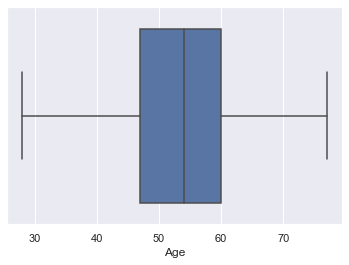

In [16]:
sns.boxplot(df.Age)

In [17]:
# no outliers in Age

<AxesSubplot:xlabel='RestingBP'>

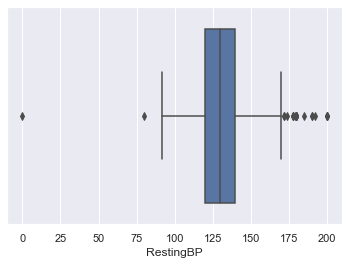

In [18]:
sns.boxplot(df.RestingBP)

<AxesSubplot:xlabel='RestingBP', ylabel='Density'>

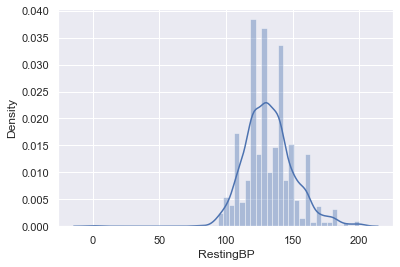

In [19]:
sns.distplot(df.RestingBP)

In [20]:
# Outliers found in restingbp, Method Used to remove outliers -> IQR based filtering

In [21]:
q3_rbp = df.RestingBP.quantile(0.75)
q1_rbp = df.RestingBP.quantile(0.25)
iqr_rbp = q3_rbp - q1_rbp
print(q1_rbp,q3_rbp,iqr_rbp)

120.0 140.0 20.0


In [22]:
rbp_l = q1_rbp - 1.5*iqr_rbp
rbp_u = q3_rbp + 1.5*iqr_rbp
print(rbp_l,rbp_u)

90.0 170.0


In [23]:
df[(df.RestingBP < rbp_l) | (df.RestingBP > rbp_u)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1


In [24]:
df = df[(df.RestingBP >= rbp_l) & (df.RestingBP <= rbp_u)]
df.shape

(890, 12)

<AxesSubplot:xlabel='Cholesterol'>

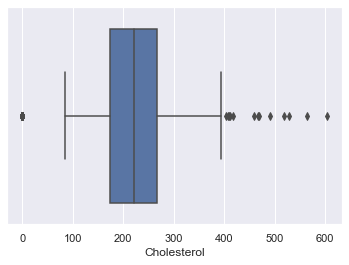

In [25]:
sns.boxplot(df.Cholesterol)

In [26]:
q3_chl = df.Cholesterol.quantile(0.75)
q1_chl = df.Cholesterol.quantile(0.25)
iqr_chl = q3_chl - q1_chl
print(q1_chl,q3_chl,iqr_chl)

174.25 265.75 91.5


In [27]:
chl_l = q1_chl - 1.5*iqr_chl
chl_u = q3_chl + 1.5*iqr_chl
chl_l, chl_u

(37.0, 403.0)

In [28]:
df[(df.Cholesterol < chl_l) | (df.Cholesterol > chl_u)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
536,62,M,NAP,133,0,1,ST,119,Y,1.2,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
624,63,F,ASY,150,407,0,LVH,154,N,4.0,Flat,1
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0


In [29]:
# removing Cholesterol outliers using IQR technique will result in loss of 174 samples
# Now trying percentile technique for removing Cholesterol Outliers

<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

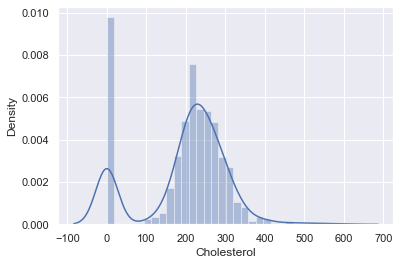

In [30]:
sns.distplot(df.Cholesterol)

In [31]:
# since the lower limit is 33.5, a large number of samples having cholesterol value = 0 will be lost

In [32]:
q3_chl = df.Cholesterol.quantile(0.99)
q1_chl = df.Cholesterol.quantile(0.01)
q1_chl, q3_chl

(0.0, 412.55000000000007)

In [33]:
df[(df.Cholesterol < q1_chl) | (df.Cholesterol > q3_chl)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
250,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1
496,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0


In [39]:
df = df[(df.Cholesterol >= q1_chl) & (df.Cholesterol <= q3_chl)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<AxesSubplot:xlabel='MaxHR'>

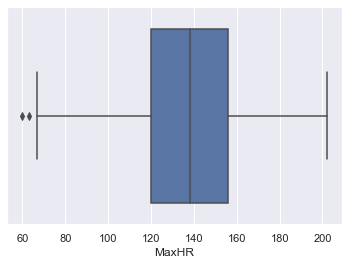

In [41]:
sns.boxplot(df.MaxHR)

<AxesSubplot:xlabel='MaxHR', ylabel='Density'>

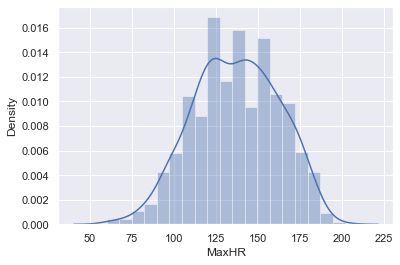

In [42]:
sns.distplot(df.MaxHR)

In [43]:
# using IQR technique

In [44]:
q3_mhr = df.MaxHR.quantile(0.75)
q1_mhr = df.MaxHR.quantile(0.25)
iqr_mhr = q3_mhr - q1_mhr
print(q1_mhr,q3_mhr,iqr_mhr)

120.0 156.0 36.0


In [45]:
mhr_l = q1_mhr - 1.5*iqr_mhr
mhr_u = q3_mhr + 1.5*iqr_mhr
mhr_l, mhr_u

(66.0, 210.0)

In [47]:
df[(df.MaxHR < mhr_l) | (df.MaxHR > mhr_u)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1


In [49]:
df = df[(df.MaxHR > mhr_l) & (df.MaxHR < mhr_u)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<AxesSubplot:xlabel='Oldpeak'>

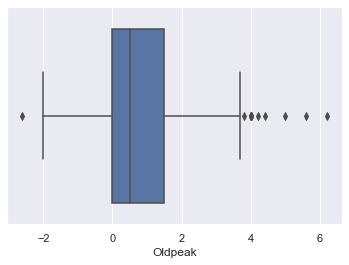

In [50]:
sns.boxplot(df.Oldpeak)

<AxesSubplot:xlabel='Oldpeak', ylabel='Density'>

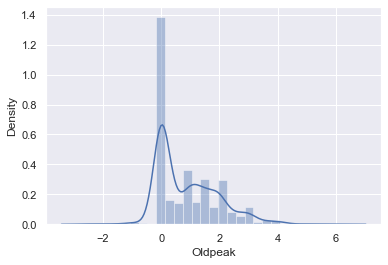

In [51]:
sns.distplot(df.Oldpeak)

In [52]:
# using IQR techinque for outliers of Oldpeak

In [53]:
q3_op = df.Oldpeak.quantile(0.75)
q1_op = df.Oldpeak.quantile(0.25)
iqr_op = q3_op - q1_op
print(q1_op,q3_op,iqr_op)

0.0 1.5 1.5


In [54]:
op_l = q1_op - 1.5*iqr_op
op_u = q3_op + 1.5*iqr_op
op_l, op_u

(-2.25, 3.75)

In [55]:
df[(df.Oldpeak < op_l) | (df.Oldpeak > op_u)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
68,52,M,ASY,160,246,0,ST,82,Y,4.0,Flat,1
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
500,65,M,ASY,136,248,0,Normal,140,Y,4.0,Down,1
521,61,M,ASY,120,282,0,ST,135,Y,4.0,Down,1
537,74,M,ASY,150,258,1,ST,130,Y,4.0,Down,1
559,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down,1
624,63,F,ASY,150,407,0,LVH,154,N,4.0,Flat,1
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
775,38,M,TA,120,231,0,Normal,182,Y,3.8,Flat,1


In [56]:
df = df[(df.Oldpeak > op_l) & (df.Oldpeak < op_u)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<AxesSubplot:xlabel='Oldpeak'>

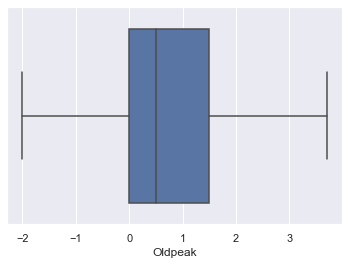

In [57]:
sns.boxplot(df.Oldpeak)

In [59]:
# all the outliers have been removed from Age, RestingBP, Cholesterol, MaxHR, Oldpeak

In [61]:
df.shape   # initially (918,12)

(865, 12)

In [62]:
print("Total number of outliers detected and removed : ", 918-df.shape[0])

Total number of outliers detected and removed :  53


Data Preparation Completed

In [68]:
# exporting the prepared and outliers free data
df.to_csv('heart_dp.csv')